In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

import plotly.express as px

In [2]:
folder = "data/comp1_2019_2"

In [3]:
df = pd.read_excel('%s/Machine Teaching Student Survey 2019_2.xlsx' % folder)
df.head(3)

,Carimbo de data/hora,Resolver os exercícios pelo sistema ajudou no meu aprendizado,O sistema possui uma interface de uso amigável,Eu estudei pelo sistema para fazer as provas,Eu tive facilidade em encontrar os exercícios passados para estudar,Eu tive facilidade em encontrar os exercícios da lista da semana para fazer,Eu recomendaria o sistema para um aluno aprendendo Comp 1,"Quando a resposta estava errada, o erro apontado no Console (parte preta) me ajudava a resolver.","Quando a resposta estava errada, a indicação de quais entradas estavam erradas me ajudava a resolver.",Senti falta do sistema na última parte da matéria,"Ao responder uma questão, onde você resolvia ela?",Diga três sugestões de melhorias
0,2019-12-04 14:23:20.943,4,5,4,5,4,5,4,4,4,Escrevia primeiro no IDLE e depois passavapara...,NaN
1,2019-12-04 14:23:21.095,2,1,1,4,5,3,2,2,1,Escrevia primeiro no IDLE e depois passavapara...,NaN
2,2019-12-04 14:35:35.758,5,5,5,3,3,5,4,5,5,"Tentava primeiro no sistema e se desse errado,...",Um envio passado pode ser um pouco difícil de ...


### Interface satisfaction
1. O sistema possui uma interface de uso amigável
2. Eu tive facilidade em encontrar os exercícios passados para estudar
3. Eu tive facilidade em encontrar os exercícios da lista da semana para fazer
4. Ao responder uma questão, onde você resolvia ela?

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


,O sistema possui uma interface de uso amigável,Eu tive facilidade em encontrar os exercícios passados para estudar,Eu tive facilidade em encontrar os exercícios da lista da semana para fazer
count,41.000000,41.000000,41.000000
mean,3.829268,4.097561,4.341463
std,1.262981,1.090983,0.990196
min,1.000000,1.000000,1.000000
25%,3.000000,4.000000,4.000000
50%,4.000000,4.000000,5.000000
75%,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


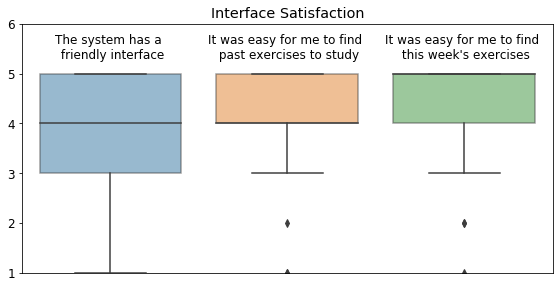

In [4]:
cols = ['O sistema possui uma interface de uso amigável', 
           'Eu tive facilidade em encontrar os exercícios passados para estudar',
          'Eu tive facilidade em encontrar os exercícios da lista da semana para fazer']
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,4))
sns.boxplot(data=df[cols], boxprops=dict(alpha=.5))
plt.text(0,5.3, 'The system has a \n friendly interface', horizontalalignment='center')
plt.text(1,5.3, 'It was easy for me to find \n past exercises to study', horizontalalignment='center')
plt.text(2,5.3, 'It was easy for me to find \n this week\'s exercises', horizontalalignment='center')
plt.xticks([])
plt.ylim(1,6)
plt.tight_layout()
plt.title("Interface Satisfaction")

plt.savefig('%s/survey_interface.eps' % folder, format='eps')
plt.savefig('%s/survey_interface.png' % folder, format='png')

df[cols].describe()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


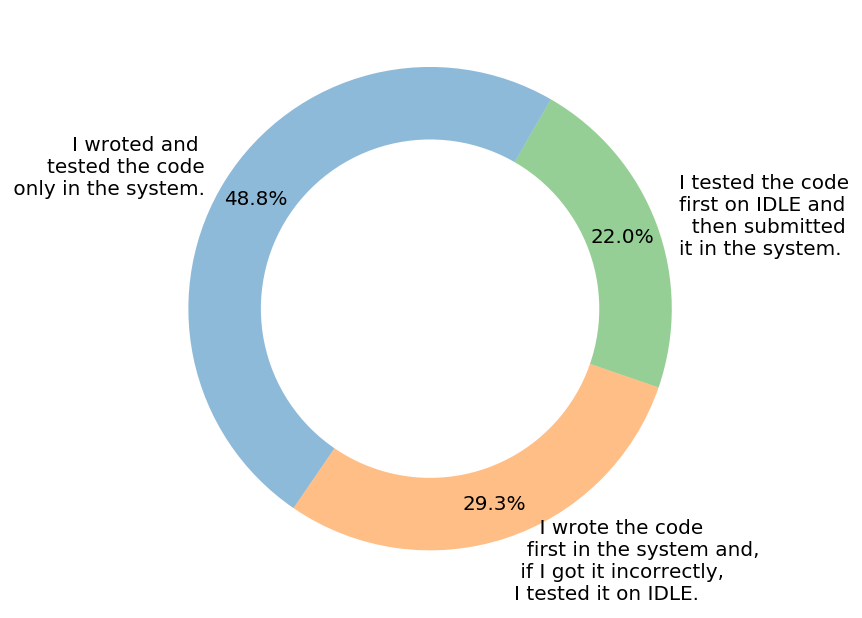

In [5]:
system_usability = df['Ao responder uma questão, onde você resolvia ela?'].copy()
system_usability[system_usability.str.contains('Tentava no sistema e se após algumas tentativas, não estivesse funcionando, tentava no shell do python no IDLE.')] \
= '    I wrote the code\n  first in the system and, \n if I got it incorrectly, \nI tested it on IDLE.'

system_usability[system_usability.str.contains('Tentava primeiro no sistema e se desse errado, tentava no IDLE')] \
= '    I wrote the code\n  first in the system and, \n if I got it incorrectly, \nI tested it on IDLE.'

system_usability[system_usability.str.contains('Escrevia primeiro no IDLE e depois passavapara o sistema')] \
= 'I tested the code \nfirst on IDLE and\n  then submitted \nit in the system.'

system_usability[system_usability.str.contains('Escrevia o código somente no sistema')] \
= 'I wroted and \ntested the code\n only in the system.'

labels = system_usability.value_counts().index.tolist()
values = system_usability.value_counts().tolist()
#colors
colors = ['#66b3ff','#99ff99','#ffcc99']

plt.rcParams.update({'font.size': 20})
fig, ax1 = plt.subplots(figsize=(12,12))
plt.pie(values, labels=labels, startangle=60, autopct='%1.1f%%', 
        pctdistance=0.85, 
        wedgeprops={'alpha':0.5}
#         colors=colors
       )

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# ax1.axis('equal')  
plt.tight_layout()

plt.savefig('%s/survey_code.eps' % folder, format='eps')
plt.savefig('%s/survey_code.png' % folder, format='png')

plt.show()

### Feedback Coverage
1. Quando a resposta estava errada, o erro apontado no Console (parte preta) me ajudava a resolver.
2. Quando a resposta estava errada, a indicação de quais entradas estavam erradas me ajudava a resolver.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


,"Quando a resposta estava errada, o erro apontado no Console (parte preta) me ajudava a resolver.","Quando a resposta estava errada, a indicação de quais entradas estavam erradas me ajudava a resolver."
count,41.000000,41.000000
mean,3.634146,3.804878
std,1.134815,1.144978
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,4.000000,5.000000
max,5.000000,5.000000


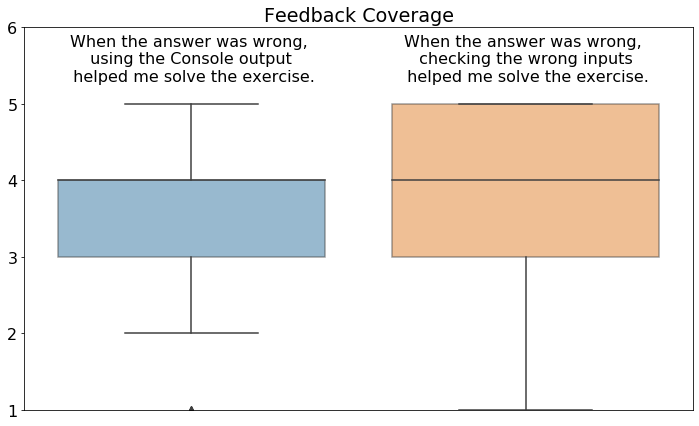

In [6]:
cols = ['Quando a resposta estava errada, o erro apontado no Console (parte preta) me ajudava a resolver.', 
        'Quando a resposta estava errada, a indicação de quais entradas estavam erradas me ajudava a resolver.',]
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 16})
sns.boxplot(data=df[cols], boxprops=dict(alpha=.5))
plt.text(0,5.3, 'When the answer was wrong, \n using the Console output \n helped me solve the exercise.', horizontalalignment='center')
plt.text(1,5.3, 'When the answer was wrong, \n checking the wrong inputs \n helped me solve the exercise.', horizontalalignment='center')
plt.xticks([])
plt.ylim(1,6)
plt.tight_layout()
plt.title("Feedback Coverage")

plt.savefig('%s/survey_feedback.eps' % folder, format='eps')
plt.savefig('%s/survey_feedback.png' % folder, format='png')

df[cols].describe()

### Learning perception
1. Resolver os exercícios pelo sistema ajudou no meu aprendizado
2. Eu estudei pelo sistema para fazer as provas
3. Eu recomendaria o sistema para um aluno aprendendo Comp 1
4. Senti falta do sistema na última parte da matéria

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


,Resolver os exercícios pelo sistema ajudou no meu aprendizado,Eu estudei pelo sistema para fazer as provas,Eu recomendaria o sistema para um aluno aprendendo Comp 1,Senti falta do sistema na última parte da matéria
count,41.00000,41.000000,41.000000,41.000000
mean,3.95122,3.195122,4.073171,3.780488
std,1.24401,1.486935,1.421095,1.294453
min,1.00000,1.000000,1.000000,1.000000
25%,3.00000,2.000000,4.000000,3.000000
50%,4.00000,3.000000,5.000000,4.000000
75%,5.00000,4.000000,5.000000,5.000000
max,5.00000,5.000000,5.000000,5.000000


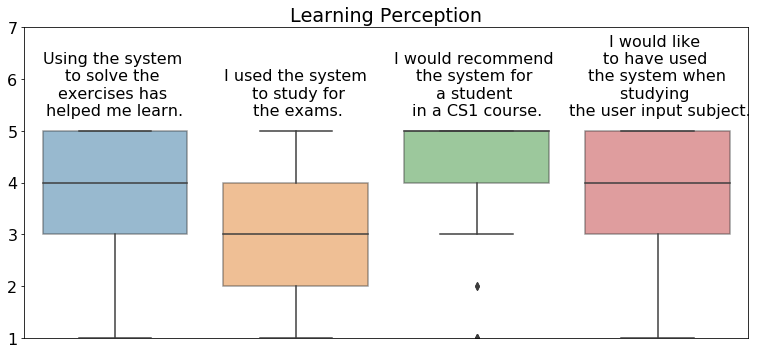

In [8]:
cols = [
    'Resolver os exercícios pelo sistema ajudou no meu aprendizado',
    'Eu estudei pelo sistema para fazer as provas',
    'Eu recomendaria o sistema para um aluno aprendendo Comp 1',
    'Senti falta do sistema na última parte da matéria']
  
plt.figure(figsize=(11,5))
plt.rcParams.update({'font.size': 16})
sns.boxplot(data=df[cols], boxprops=dict(alpha=.5))
plt.text(0,5.3, 'Using the system \nto solve the \nexercises has \nhelped me learn.', horizontalalignment='center')
plt.text(1,5.3, 'I used the system\n to study for\n the exams.', horizontalalignment='center')
plt.text(2,5.3, 'I would recommend \nthe system for \na student \nin a CS1 course.', horizontalalignment='center')
plt.text(3,5.3, 'I would like \nto have used \n the system when \nstudying \n the user input subject.', horizontalalignment='center')
plt.xticks([])
plt.ylim(1,7)
plt.tight_layout()
plt.title("Learning Perception")

plt.savefig('%s/survey_learning.eps' % folder, format='eps')
plt.savefig('%s/survey_learning.png' % folder, format='png')

df[cols].describe()

### Improvements

In [234]:
improvements = df['Diga três sugestões de melhorias'].dropna()
print(improvements.shape)
# display(HTML(pd.DataFrame(improvements).to_html()))
improvements_df = pd.DataFrame(improvements)
for row in improvements_df.iterrows():
    print(row[1].values[0])
    feedback = input('Feedback? Y/N')
    if feedback == 'Y':
        ['feedback'] = True
    else:
        df['feedback'] = False

(21,)
Um envio passado pode ser um pouco difícil de encontrar, seria bom poder escolher um exercício antes e ver os envios passados dele.
Os exercícios da semana 10 ficaram no final das página de exercícios, antes da semana 3. Filtrar e escolher a semana para ver os exercícios correspondentes ajudaria a encontrar a lista desejada.
Gostaria de poder escolher outros exercícios do sistema além dos que estão na lista sem usar o random, podendo escolher o assunto para exercitar.
Feedback? Y/NN
o site parece que nao é compativel com alguns browsers.
as vezes informava que a senha ou o email estavam errados, mesmo nao estando.
os emails para recuperação de senha nao eram enviados.
Feedback? Y/NN
Não sei, achei muito bom de verdade.
Feedback? Y/NN
Mais exercícios, mesmo que fáceis, visando a fixação e a memorização. Exercícios disponíveis desde o início do curso, visando o avanço do conteúdo no ritmo do aluno.
Feedback? Y/NN
1- quando por ex eu estava fazendo o exercício 1 da aula 7 e clicava 